# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### Lets know about the data - EDA

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


- __No missing values__
- __Two numerical variables and one categorical__

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


- __The diffenrce between the man and 75% is not huge, indicate presence of low number of outliers we can check that later creating Boxplots__

In [5]:
df['gender'].value_counts()

M    65
F    65
Name: gender, dtype: int64

- __Equal number of males and females__

In [6]:
unique_temps = df.temperature.unique()
unique_temps.sort()
print(unique_temps)
print(len(unique_temps))

[ 96.3  96.4  96.7  96.8  96.9  97.   97.1  97.2  97.3  97.4  97.5  97.6
  97.7  97.8  97.9  98.   98.1  98.2  98.3  98.4  98.5  98.6  98.7  98.8
  98.9  99.   99.1  99.2  99.3  99.4  99.5  99.9 100.  100.8]
34


In [7]:
unique_HR = df.heart_rate.unique()
unique_HR.sort()
print(unique_HR)
print(len(unique_HR))

[57. 58. 59. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75.
 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 89.]
31


- __34 different tempratures are distributed among 130 participants__
- __31 unique heart rate values are ditributed among 130 participants__

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set()

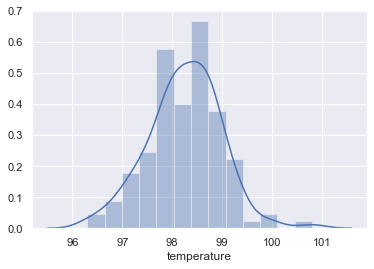

In [11]:
sns.distplot(df['temperature'])

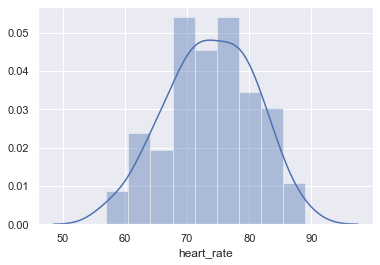

In [12]:
sns.distplot(df['heart_rate'])

- __Looking at the curves and histograms, both the variables look normally distributed__
- __We can check that later statistically__


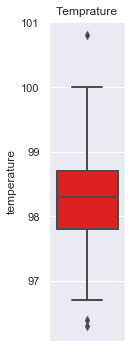

In [13]:
plt.figure(figsize=(2, 5))
sns.boxplot(df.temperature, color = 'red', linewidth=2, orient = 'v') 
plt.title("Temprature")
plt.tight_layout()

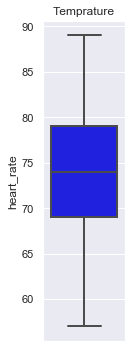

In [14]:
plt.figure(figsize=(2, 5))
sns.boxplot(df.heart_rate, color = 'blue', linewidth=2, orient = 'v') 
plt.title("Temprature")
plt.tight_layout()

- __Absence of outliers__
- __Data look clean__

### Q1. Is the distribution of body temperatures normal?

- __We have already checked the normal distribution curve in the histogram which look normally distributed__
- __We can also use the Empirical Cumulative Distribution Function or ECDF__

In [15]:
import numpy as np

In [16]:
# Creat a function 
def ecdf(data):
    """Computes the Empirical Cummulative Distribution Function (ecdf)"""
    n = len(data) # number of elements
    x = np.sort(data) # sorting the data, x data for ECDF
    y = np.arange(1, n + 1) / n # y data fro ECDF
    return x, y

In [17]:
#temperature data statistics
temp_mean = np.mean(df["temperature"])
temp_std = np.std(df["temperature"])
temp_len = len(df["temperature"])

In [18]:
print (temp_mean, "\n", temp_std,"\n", temp_len)

98.24923076923078 
 0.7303577789050377 
 130


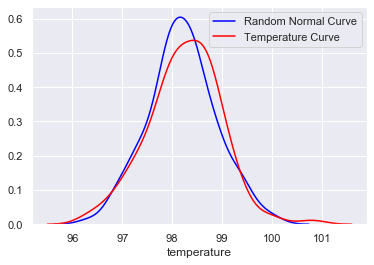

In [19]:
#randomly generated normal curve based on temp statistics
np.random.seed(42)
true_normal = np.random.normal(temp_mean, temp_std, size=temp_len)

#distribution plots without showing the histogram (hist = False)
sns.distplot(true_normal, color="blue", hist=False, label="Random Normal Curve")
sns.distplot(df['temperature'], color="red", hist=False, label=  "Temperature Curve")

plt.show()

- __Overllaping of curves with randon data and the observed temperature did not vary much suggesting a normal distribution__

In [20]:
#getting ECDF coordinates
# used the function ecdf defined earlier
temp_x, temp_y = ecdf(df["temperature"])
true_x, true_y = ecdf(true_normal)

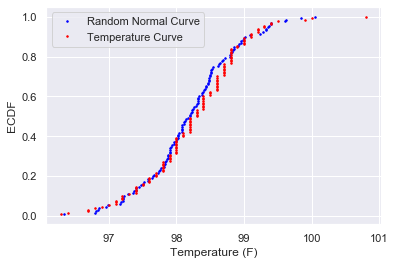

In [21]:
#ECDF plots with no linestyle
plt.plot(true_x, true_y, marker=".", \
         markersize=3, linestyle = 'none', color="blue", label="Random Normal Curve")
plt.plot(temp_x, temp_y, marker=".", \
         markersize=3, linestyle = 'none', color="red", label="Temperature Curve")

plt.xlabel("Temperature (F)")
plt.ylabel("ECDF")
plt.legend()
plt.show()

- __Looking at both hist with line and ecdf curve, the temprature data look normal__

- __FINDING NORMLAITY IN TERMS OF NUMERIC NUMBERS__
- __USING SCIPY__
- __In order to verify probabilistically, we can perform a Normality test__
- __A common approach I found is the <font color=green> Shapiro-Wilk test.__

In [26]:
import scipy.stats as stats

alpha = 0.05

stat, p = stats.shapiro(df["temperature"])

print("W-Statistic:", stat)
print("P-Value: ", p)
print("alpha: ", alpha)
print("P-Value larger than alpha?" , str(p > alpha))

if p > alpha:
    print("Temperature Curve is Normal and hence data is normally distributed")
else:
    print("Temperature Curve is not normal and hence data is skewed")

W-Statistic: 0.9865770936012268
P-Value:  0.233174666762352
alpha:  0.05
P-Value larger than alpha? True
Temperature Curve is Normal and hence data is normally distributed


- __Since our P-value is greater than the critical value (set at 5%), the null hypothesis that assumes the data is normal should not be rejected. Therefore, the Temperature function is a normal distribution__

### <font color = blue > A1: The temprature data is normally distributed

------------------------------------------------------------

### Q2. Is the sample size large? Are the observations independent?

The sample size is 130 and we are looking at the human body temperature data.   Following the 10% rule, it would take that the human population around the 1860's be less than 1,300 for the observations to be considered dependent. The sample size is 130, and considering the 10% rule the whole population would be 1300, which seems not true in the year 1860s when the experiments was conducted. Therefore, the sample entries can be said to be independent of each other. 

In [27]:
df.shape

(130, 3)

In [28]:
# Sample Size
if len(df) > 30:
    print ("Large Sample Size")
else:
    print ("Small Sample Size")

Large Sample Size


### <font color=blue > A2 : Yes, the sample size can be considered large enough (n >= 30) for statistical inference. We can assume that data is independent

-----------------

### Q3. Is the true population mean really 98.6 degrees F?

- Since we will be comparing our dataset with a set mean value, we'll be performing a __two-sample Bootstrap approach__.
-  This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent  observations a is equal to the given population mean, popmean.
- <font color=blue>__Null hypothesis__:</font>  temp_mean = 98.6.
- <font color=green>__Alternative hypothesis__:</font> temp_mean is not equal to 98.6.
- It would be appropriate to use the <font color=red> __z statistic__ </font> because the sample size is greater than 30.

In [36]:
u = 98.6 # mean provided population mean
n = len(df.temperature) # number of samples 
print(u, n)

98.6 130


In [37]:
# Find the mean temperature of the sample population
x = df['temperature'].mean()
x

98.24923076923078

In [38]:
# Find the standard deviation of the sample population
std = df['temperature'].std()
std

0.7331831580389454

In [39]:
import math
z_score = (x-u) / (std / math.sqrt(n))
z_score

-5.454823292364079

In [40]:
# hypothesis test for z-score
alpha = 0.05
if z_score < alpha:
    print("The null hypothesis - can be rejected")
else:
    print("The null hypothesis - cannot be rejected")

The null hypothesis - can be rejected


- Level of Significance - Reject null hypothesis if Z-Score < -1.96 or Z-Score > 1.96
- __Conclusion__ - Since Z-Score < -1.96 is true, we can reject the null hypothesis. We can conclude that there is sufficient evidence to support alternative hypothesis that average body temperature is different from 98.6

### <font color = blue >A3: This supports alternative hypothesis that average body temperature is different from 98.6 F.

______

### Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [42]:
# generate random sample
df10 = np.random.choice(df['temperature'], size=10)
print (df10)

[98.8 98.  98.1 98.  97.6 98.2 98.4 97.9 97.4 99.1]


- Since we have only 10 samples it is more appropriate to use the t-test.

In [53]:
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df10, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.7759919088901834
p value = 0.02154144645457844


In [52]:
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df10, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -2.775991908890183
p value = 0.005503357801231288


* Since we have taken the samples (10) from the population (130), applying t-test would be more appropriate
* Also we don't know the standard deviation of the population (sigma)

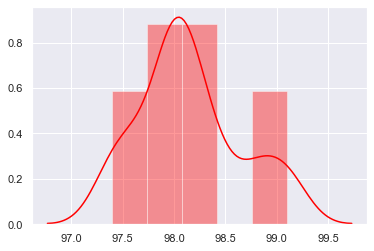

In [54]:
sns.distplot(df10, color='red')
plt.show()

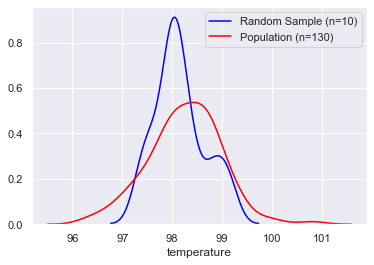

In [55]:
sns.distplot(df10, color="blue", hist=False, label="Random Sample (n=10)")
sns.distplot(df['temperature'], color="red", hist=False, label=  "Population (n=130)")
plt.legend()
plt.show()

### Q5: At what temperature should we consider someone's temperature to be "abnormal"?

In [57]:
# calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))

print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674824, 99.68070571171332)


### <font color = blue > A5: We can consider a temperature to be "abnormal" if it is less than 96.81 or greater than 99.68¶

In [58]:
N_popluation = len(df) # number of observations
df_mean = df['temperature'].mean() # mean 
df_std = df['temperature'].std()
print(N_popluation)
print(df_mean)
print (df_std)

130
98.24923076923078
0.7331831580389454


- __Decide__ what Confidence Interval we want: 95% or 99% are common choices. Then find the "Z" value for that Confidence Interval here:

- For 95% the Z value is 1.960

In [182]:
CI_positive = df_mean + (1.960 * df_std / (N_popluation**0.5)) #0.5 for is math sqrt
print(CI_positive)

98.37526742623304


In [183]:
CI_negative = df_mean - (1.960 * df_std / (N_popluation**0.5))
print(CI_negative)

98.12319411222852


In [59]:
import math 
# Margin og Error
# Start by computing the margin of error and confidence interval.
## Margin of Error = std / Sqrt(Size) 
Margin_Error = df_std / math.sqrt(N_popluation)
print('Margin Error is' , Margin_Error)

Margin Error is 0.06430441683789101


- __Confidence Interval at 95% = (Mean - Margin Error) and (Mean  + Margin Error)__

### Q6. Is there a significant difference between males and females in normal temperature?

In [60]:
# Temp details based on sex
M = df[df["gender"] == "M"]["temperature"]
F = df[df["gender"] == "F"]["temperature"]

display("Male Temperature Data Stats", \
      pd.DataFrame(M.describe()))

display("Female Temperature Data Stats", \
      pd.DataFrame(F.describe()))

'Male Temperature Data Stats'

,temperature
count,65.000000
mean,98.104615
std,0.698756
min,96.300000
25%,97.600000
50%,98.100000
75%,98.600000
max,99.500000


'Female Temperature Data Stats'

,temperature
count,65.000000
mean,98.393846
std,0.743488
min,96.400000
25%,98.000000
50%,98.400000
75%,98.800000
max,100.800000


Plotting M vs. F will give us the judgmen of their difference. We can run the dictribution and ECDF on the temrature data based on the sex. 

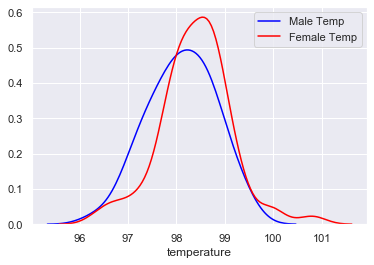

In [61]:
# SImilar to the above we can plot the normal distribution curve and the ECDF 
#getting ECDF coordinates
M_x, M_y = ecdf(M)
F_x, F_y = ecdf(F)

#distribution plots

sns.distplot(M, color="blue", hist=False, label="Male Temp")
sns.distplot(F, color="red", hist=False, label=  "Female Temp")
plt.legend()
plt.show()

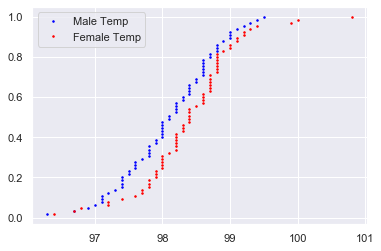

In [62]:
#ECDF plots
plt.plot(M_x, M_y, linestyle="none", marker=".", \
         markersize=3, color="blue", label="Male Temp")
plt.plot(F_x, F_y, linestyle="none", marker=".", \
         markersize=3, color="red", label="Female Temp")
plt.legend()
plt.show()

- Z-test for testing equality of variance is used to test the hypothesis of equality of two population variances when the sample size of each sample is 30 or larger.

-  If the calculated z-score is larger than table value, you can reject the null hypothesis.
- Your sample size is greater than 30. Otherwise, use a t test.
- Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
- Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
- Your data should be randomly selected from a population, where each item has an equal chance of being selected.
- Sample sizes should be equal if at all possible.

In [68]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest, pval = stests.ztest(M,F, value = 0 , alternative='two-sided')
print(ztest)
print(pval)

-2.2854345381656103
0.02228736076065755


In [69]:
alpha = 0.05
if pval > alpha:
    print ('not statistically significant')
else:
    print ('statistically significant')

statistically significant


### <font color = blue > A6: Female body normal temeprature is significantly higher than male body normal temperature (p<0.05)